In [ ]:
import torch
torch.__version__

# Linear Regression using Pytorch

## Flow of program
0. Import Important libraries
1. Get dataset ready (turn into tensor and batches)
2. Build Linear Regression
3. Pick a loss Function and Optimizer
4. Build a training Loop
5. Evaluate Model
6. Test model with a new data point
7. Save Model

###**0. Importing Important Libraries**

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

###**1. Get dataset ready (turn into tensor and batches)**

In [ ]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [ ]:
x_train,y_train

(array([[ 3.3  ],
        [ 4.4  ],
        [ 5.5  ],
        [ 6.71 ],
        [ 6.93 ],
        [ 4.168],
        [ 9.779],
        [ 6.182],
        [ 7.59 ],
        [ 2.167],
        [ 7.042],
        [10.791],
        [ 5.313],
        [ 7.997],
        [ 3.1  ]], dtype=float32),
 array([[1.7  ],
        [2.76 ],
        [2.09 ],
        [3.19 ],
        [1.694],
        [1.573],
        [3.366],
        [2.596],
        [2.53 ],
        [1.221],
        [2.827],
        [3.465],
        [1.65 ],
        [2.904],
        [1.3  ]], dtype=float32))

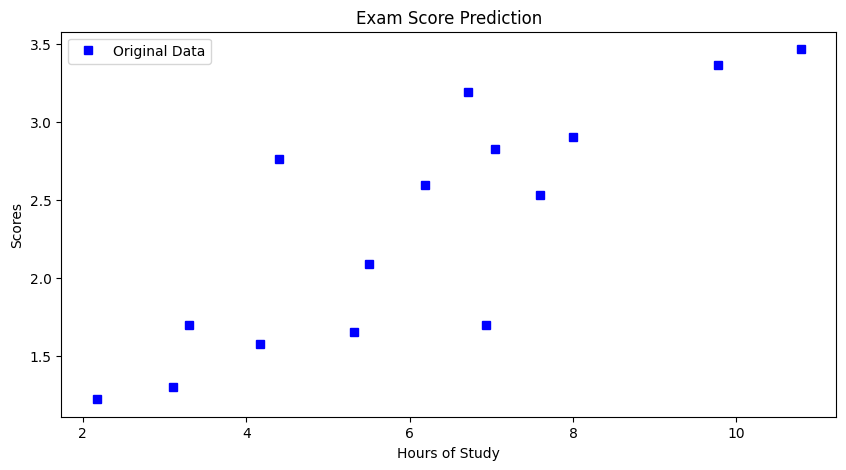

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.plot(x_train,y_train,'bs',label='Original Data')
plt.xlabel('Hours of Study')
plt.ylabel('Scores')
plt.legend()
plt.title('Exam Score Prediction')
plt.show()

x_train we will train our model , we will test our model with new data point 8 hour

In [ ]:
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)
x_train,y_train

(tensor([[ 3.3000],
         [ 4.4000],
         [ 5.5000],
         [ 6.7100],
         [ 6.9300],
         [ 4.1680],
         [ 9.7790],
         [ 6.1820],
         [ 7.5900],
         [ 2.1670],
         [ 7.0420],
         [10.7910],
         [ 5.3130],
         [ 7.9970],
         [ 3.1000]]),
 tensor([[1.7000],
         [2.7600],
         [2.0900],
         [3.1900],
         [1.6940],
         [1.5730],
         [3.3660],
         [2.5960],
         [2.5300],
         [1.2210],
         [2.8270],
         [3.4650],
         [1.6500],
         [2.9040],
         [1.3000]]))

In [ ]:
x_train.shape,y_train.shape

(torch.Size([15, 1]), torch.Size([15, 1]))

###**2. Build Linear Regression Model**

In [ ]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear=nn.Linear(1,1)

  def forward(self,x):
    out=self.linear(x)
    return out

In [ ]:
model = LinearRegression()

In [ ]:
model

LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.6073]], requires_grad=True),
 Parameter containing:
 tensor([-0.5396], requires_grad=True)]

###**3. Pick a loss Function and Optimizer**

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01) #0.0001


###**4.Build a Training loop**

In [ ]:
num_epochs=1000

In [ ]:
for epoch in range(num_epochs):
  model.train()
  out = model(x_train)
  loss = criterion(out,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if (epoch+1) % 200 == 0:
    print(f"Epoch: [{epoch+1}/{num_epochs}] , Loss:{loss.item():.6f}")


Epoch: [200/1000] , Loss:0.209848
Epoch: [400/1000] , Loss:0.176110
Epoch: [600/1000] , Loss:0.169566
Epoch: [800/1000] , Loss:0.168946
Epoch: [1000/1000] , Loss:0.168916


###**5. Evaluate a model**

In [ ]:
model.eval()
with torch.no_grad():
  predicted = model(x_train)
predicted.data.numpy()

array([[1.6044157],
       [1.8907801],
       [2.1771443],
       [2.492145 ],
       [2.549418 ],
       [1.8303833],
       [3.2911015],
       [2.35469  ],
       [2.7212365],
       [1.3094606],
       [2.578575 ],
       [3.5545566],
       [2.1284623],
       [2.8271914],
       [1.5523496]], dtype=float32)

In [ ]:
y_train

tensor([[1.7000],
        [2.7600],
        [2.0900],
        [3.1900],
        [1.6940],
        [1.5730],
        [3.3660],
        [2.5960],
        [2.5300],
        [1.2210],
        [2.8270],
        [3.4650],
        [1.6500],
        [2.9040],
        [1.3000]])

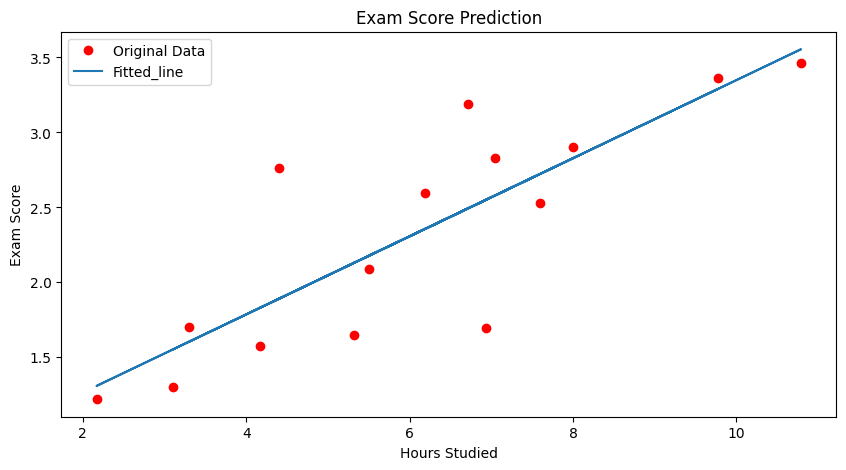

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.plot(x_train.numpy(),y_train.numpy(),'ro',label='Original Data')
plt.plot(x_train.numpy(),predicted,label='Fitted_line')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.title('Exam Score Prediction')
plt.show()

In [ ]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.2603]])),
             ('linear.bias', tensor([0.7453]))])

###**6. Test model with new data point**

In [ ]:
new_hours_studied = 8.0
new_hours_tensor = torch.tensor([[new_hours_studied]],dtype=torch.float32)

In [ ]:
model.eval()
with torch.no_grad():
  new_exam_score = model(new_hours_tensor)

print(f"New Exam Score  for a student studeing {new_hours_studied} : {new_exam_score.item()}")

New Exam Score  for a student studeing 8.0 : 2.827972173690796


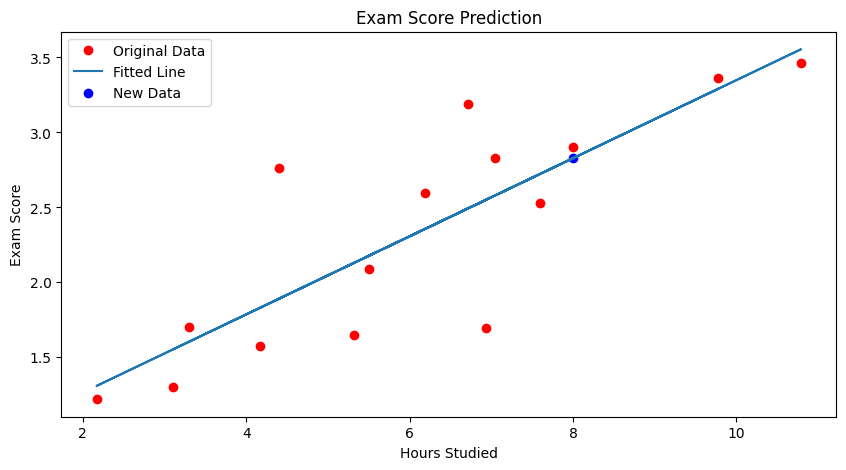

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.plot(x_train.numpy(),y_train.numpy(),'ro',label='Original Data')
plt.plot(x_train.numpy(),predicted,label='Fitted Line')
plt.scatter([new_hours_studied],[new_exam_score.item()],color='blue',label='New Data')
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Exam Score Prediction")
plt.legend()
plt.show()

###**7. Save Model**

In [ ]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.2603]])),
             ('linear.bias', tensor([0.7453]))])

In [ ]:
torch.save(model.state_dict,'./LinearRegression.pth')